### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data

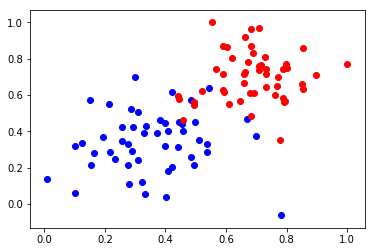

In [2]:
# Load dataset
data = np.asarray(pd.read_csv('../dataset/random_dataset1', header=None))

# Separate inputs and labels
X = data[:,:-1]
Y = data[:,-1]

# Plot the loaded dataset
cdict = {0: 'red', 1: 'blue'}
fig, ax = plt.subplots()
for i in range(0, len(X)):
    plt.scatter(X[i][0],X[i][1], color=cdict[Y[i]])
plt.show()

### Model

In [3]:
# Step activation function
def step_activation(t):
    return 1 if t >= 0 else 0

# Prediction function
def predict(x, w, b):
    return step_activation(np.matmul(x, w)+b)

def back_step(x, w, b, y, learning_rate=0.01):
    # Iteract over all dataset samples
    for i in range(len(x)):
        y_hat = predict(x[i], w, b)
        # If a true sample is classified as a negative sample,
        # increase weights/bias, bring decision line closer to the
        # negative sample
        if (y[i] - y_hat == 1):
            w[0] += x[i][0]*learning_rate
            w[1] += x[i][1]*learning_rate
            b += learning_rate
        # If a negative sample is classified as a true sample,
        # decrease weights/bias, bring decision line closer to the
        # positive sample
        elif(y[i] - y_hat == -1):
            w[0] -= x[i][0]*learning_rate
            w[1] -= x[i][1]*learning_rate
            b -= learning_rate
    return w, b
    

### Run model

In [4]:
# Set random seed
np.random.seed(42)

# Initialize random weights and bias
W = np.array(np.random.rand(2,1))
b = np.random.rand(1)[0]
boundaries = []

# Run model with 25 epochs
for i in range(25):
    W, b = back_step(X, W, b, Y)
    # Save weights and biases for later plot of decision boundaries
    boundaries.append((W[0][0], W[1][0], b))

In [5]:
def print_decision(X, Y, boundaries):
    # Plot dataset samples
    for i in range(0, len(X)):
        plt.scatter(X[i][0], X[i][1], color=cdict[Y[i]])
    # Plot last 10 decision boundaries
    for i in range(15, 25):
        w1 = boundaries[i][0]
        w2 = boundaries[i][1]
        b = boundaries[i][2]

        x = -b / w1
        y = -b / w2
        d = y
        c = -y / x

        line_x_coords = np.array([0, x])
        line_y_coords = c * line_x_coords + d
        plt.plot(line_x_coords, line_y_coords)
        
    plt.show()

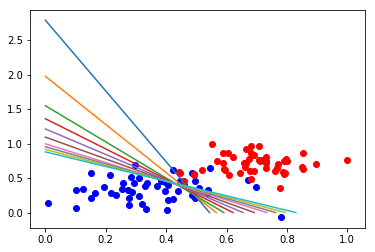

In [6]:
print_decision(X, Y, boundaries)